In [80]:
#read CSV file
import pandas as pd
import re
#statistical data visualization
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np



frame = pd.read_csv('input/pokemon.csv')
frame.head(20)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [81]:
# filter out bad names "Mega" 
frame.Name = frame.Name.apply(lambda x: re.sub(r'(.+)(Mega.+)', r'\2', x))
# filter out bad names "Primal" 
frame.Name = frame.Name.apply(lambda x: re.sub(r'(.+)(Primal.+)', r'\2', x))
# filter out "Hoopa"
frame.Name = frame.Name.apply(lambda x: re.sub(r'(.+)(Hoopa.+)',r'\2',x))

In [82]:
#remove all Mega pokémons and Primal pokémons
All = frame.loc[(frame['Name'].str.contains("Mega") == False) & (frame['Name'].str.contains("Primal") == False)]

In [83]:
#split up legendary and normal pokemons
poke = All.loc[(All.Legendary == False)]
pokeL = All.loc[(All.Legendary == True)]

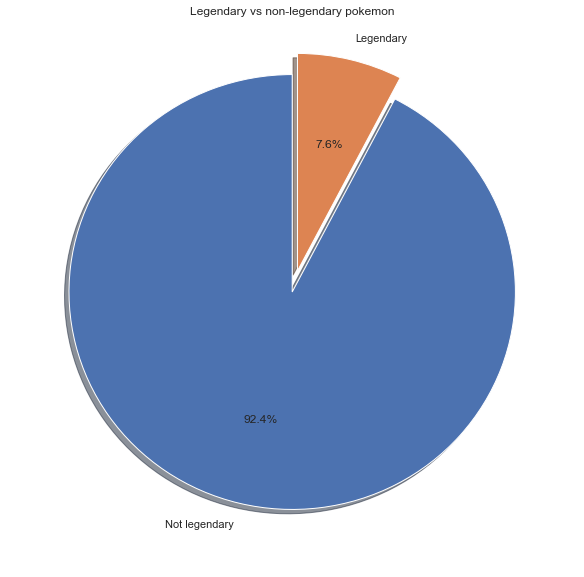

In [84]:
#Pie chart of legendary vs non-legendary pokemon
legendarySplit =[poke.Name.count(),pokeL.Name.count()]
legendPie = plt.pie(legendarySplit,labels=["Not legendary","Legendary"], 
                    autopct = '%1.1f%%', shadow = True, 
                    startangle=90,explode=(0,0.1))
plt.title("Legendary vs non-legendary pokemon",fontsize=12)
fig = plt.gcf()
fig.set_size_inches(10,10)

In [85]:
gen1 = poke.loc[poke.Generation == 1]
gen2 = poke.loc[poke.Generation == 2]
gen3 = poke.loc[poke.Generation == 3]
gen4 = poke.loc[poke.Generation == 4]
gen5 = poke.loc[poke.Generation == 5]
gen6 = poke.loc[poke.Generation == 6]

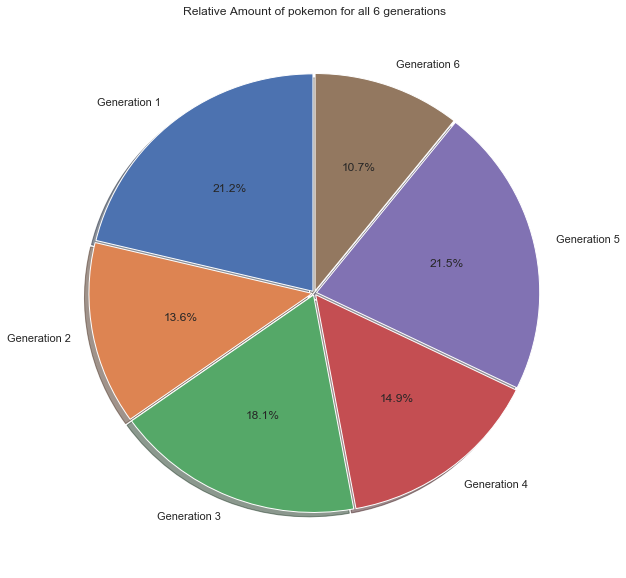

In [86]:
#Pie chart of Relative Amount of pokemon for all 6 generations
generationSplit =[gen1.Name.count(),gen2.Name.count(),gen3.Name.count(),gen4.Name.count(),gen5.Name.count(),gen6.Name.count()]
legendPie = plt.pie(generationSplit,labels=["Generation 1","Generation 2","Generation 3","Generation 4","Generation 5","Generation 6"], 
                    autopct = '%1.1f%%', shadow = True, 
                    startangle=90,explode=(0.01,0.01,0.01,0.01,0.01,0.01))
plt.title("Relative Amount of pokemon for all 6 generations",fontsize=12)
fig = plt.gcf()
fig.set_size_inches(10,10)


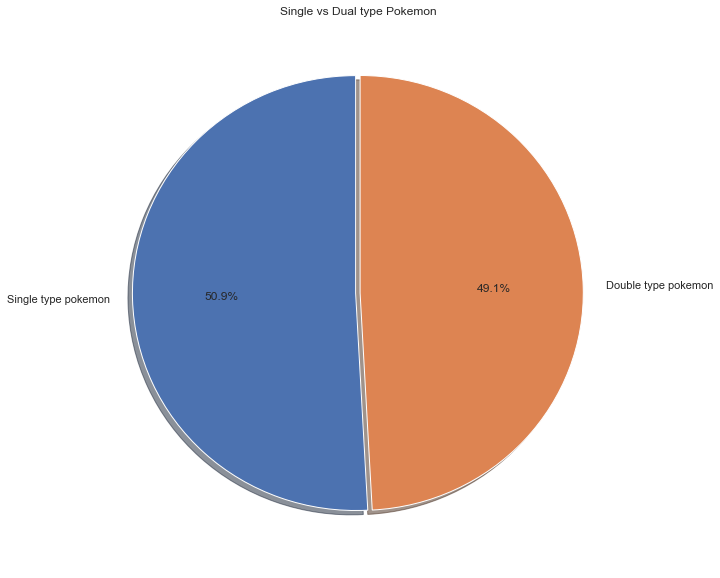

In [87]:
# Single vs Dual type Pokemon
singleTypePokemonCount = poke["Type 2"].isnull().sum()
dualTypePokemonCount = poke["Type 2"].notnull().sum()

singlevsdualPokeSplit =[singleTypePokemonCount ,dualTypePokemonCount ]
legendPie = plt.pie(singlevsdualPokeSplit,labels=["Single type pokemon","Double type pokemon"], 
                    autopct = '%1.1f%%', shadow = True, 
                    startangle=90,explode=(0.01,0.01))
plt.title("Single vs Dual type Pokemon",fontsize=12)
fig = plt.gcf()
fig.set_size_inches(10,10)

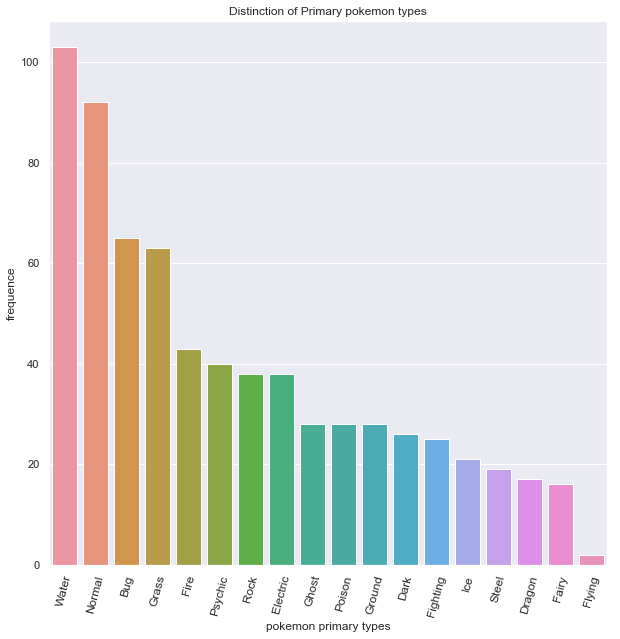

In [88]:
Type1 = pd.value_counts(poke['Type 1'])

sn.set()
dims = (10,10)
fig,ax = plt.subplots(figsize=dims)
barT = sn.barplot(x=Type1.index,y=Type1,data=poke, ax=ax)
barT.set_xticklabels(barT.get_xticklabels(),rotation = 75 , fontsize = 12)
barT.set(xlabel='pokemon primary types', ylabel='frequence')
barT.set_title("Distinction of Primary pokemon types")
figBar = barT.get_figure()
figBar.savefig("123.png")



[Text(0.5,1,'correlation between base stats of Pokémon')]

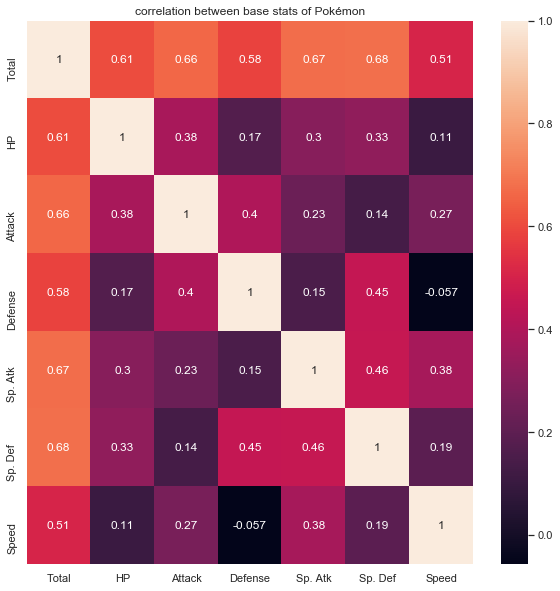

In [91]:
corrStats = poke[["Total","HP","Attack","Defense","Sp. Atk","Sp. Def","Speed"]]
sn.set()
dims = (10,10)
fig,ax = plt.subplots(figsize=dims)
correlationMap = sn.heatmap(corrStats.corr(),annot = True, ax = ax)
correlationMap.set(title="correlation between base stats of Pokémon")


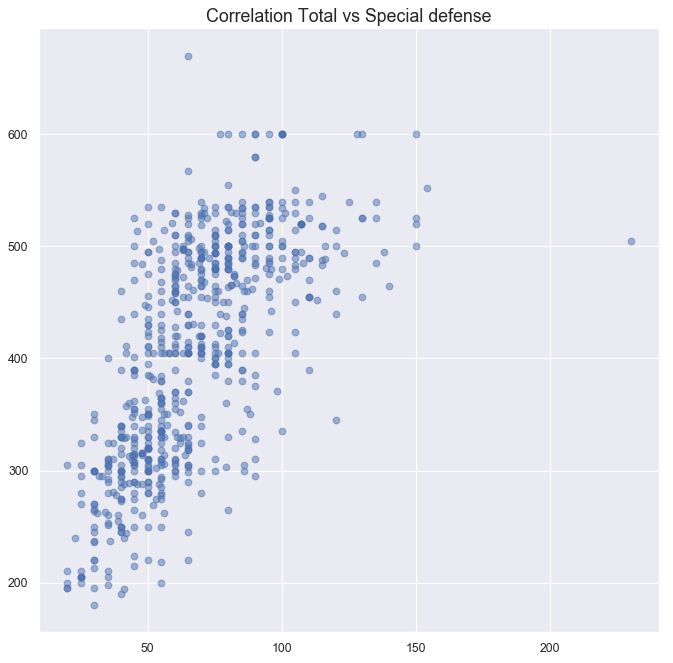

In [103]:
corrTotalvsSpDef = poke[["Total","Sp. Def"]]

plt.figure(figsize=(10, 10), dpi=80)
plt.title("Correlation Total vs Special defense",fontsize=16)
plt.scatter(x=poke["Sp. Def"], y=poke["Total"], alpha=0.5)
plt.show()